In [1]:
from os import path

import xarray as xr
import numpy as np
from dask import array as da


from matplotlib import pyplot as plt

import panel as pn
import holoviews as hv
import geoviews as gv

from datetime import datetime as dt, UTC, timedelta
from pyxlma import coords


from cartopy import crs as ccrs
from cartopy import feature as cfeat


from GOES_temp_tracking import read_tobac_ds, add_goes_data_to_tobac_path

pn.extension() 
hv.extension('bokeh')

In [3]:
rdr = xr.open_dataset('/Volumes/LtgSSD/KHGX20220601_213349_V06_grid.nc')
rdr.load()

<xarray.Dataset> Size: 1GB
Dimensions:                     (time: 1, x: 1001, y: 1001, z: 31, nradar: 1)
Coordinates:
  * time                        (time) datetime64[ns] 8B 2022-06-01T21:33:49....
  * x                           (x) float64 8kB -2.5e+05 -2.495e+05 ... 2.5e+05
  * y                           (y) float64 8kB -2.5e+05 -2.495e+05 ... 2.5e+05
  * z                           (z) float64 248B 0.0 500.0 ... 1.45e+04 1.5e+04
Dimensions without coordinates: nradar
Data variables: (12/20)
    origin_latitude             (time) float64 8B 29.47
    origin_longitude            (time) float64 8B -95.08
    origin_altitude             (time) float64 8B 34.0
    projection                  int32 4B 1
    ProjectionCoordinateSystem  int32 4B 1
    radar_latitude              (nradar) float64 8B 29.47
    ...                          ...
    D0                          (time, z, y, x) float32 124MB nan nan ... nan
    NW                          (time, z, y, x) float32 124MB nan nan ... nan
    MU                          (time, z, y, x) float32 124MB nan nan ... nan
    MW                          (time, z, y, x) float32 124MB nan nan ... nan
    MI                          (time, z, y, x) float32 124MB nan nan ... nan
    ROI                         (time, z, y, x) float32 124MB 3.703e+03 ... 3...
Attributes: (12/16)
    Conventions:         CF/Radial instrument_parameters
    version:             1.3
    title:               
    institution:         
    references:          
    source:              
    ...                  ...
    field_names:         differential_reflectivity, differential_phase, veloc...
    history:             
    volume_number:       0
    platform_type:       fixed
    instrument_type:     radar
    primary_axis:        axis_z

In [21]:
tfm = xr.open_dataset('tobac_15/tobac_Save_20220601/Track_features_merges_augmented.nc', chunks='auto')
tfm

<xarray.Dataset> Size: 1GB
Dimensions:                           (feature: 23634, time: 285, y: 1001,
                                       x: 1001, track: 1258, cell: 1514)
Coordinates:
  * feature                           (feature) int64 189kB 1 2 ... 23633 23634
  * time                              (time) datetime64[ns] 2kB 2022-06-01T00...
  * y                                 (y) float64 8kB -2.5e+05 ... 2.5e+05
  * x                                 (x) float64 8kB -2.5e+05 ... 2.5e+05
  * track                             (track) float64 10kB 0.0 1.0 ... 1.257e+03
  * cell                              (cell) int64 12kB -1 1 3 ... 5938 5952
Data variables: (12/31)
    feature_time_index                (feature) int64 189kB dask.array<chunksize=(23634,), meta=np.ndarray>
    feature_id_this_frame             (feature) int64 189kB dask.array<chunksize=(23634,), meta=np.ndarray>
    feature_hdim1_coordinate          (feature) float64 189kB dask.array<chunksize=(23634,), meta=np.ndarray>
    feature_hdim2_coordinate          (feature) float64 189kB dask.array<chunksize=(23634,), meta=np.ndarray>
    feature_grid_cell_count           (feature) int64 189kB dask.array<chunksize=(23634,), meta=np.ndarray>
    feature_threshold_max             (feature) float64 189kB dask.array<chunksize=(23634,), meta=np.ndarray>
    ...                                ...
    min_L2-ACHTF                      (feature, time) float64 54MB dask.array<chunksize=(23634, 285), meta=np.ndarray>
    avg_L2-ACHTF                      (feature, time) float64 54MB dask.array<chunksize=(23634, 285), meta=np.ndarray>
    std_L2-ACHTF                      (feature, time) float64 54MB dask.array<chunksize=(23634, 285), meta=np.ndarray>
    min_L2-MCMIPC                     (feature, time) float64 54MB dask.array<chunksize=(23634, 285), meta=np.ndarray>
    avg_L2-MCMIPC                     (feature, time) float64 54MB dask.array<chunksize=(23634, 285), meta=np.ndarray>
    std_L2-MCMIPC                     (feature, time) float64 54MB dask.array<chunksize=(23634, 285), meta=np.ndarray>
Attributes:
    center_lat:  29.47
    center_lon:  -95.08

In [23]:
sat_data_test = xr.open_dataset('~/data/noaa-goes16/ABI-L2-ACHAC/2022/151/23/OR_ABI-L2-ACHAC-M6_G16_s20221512356173_e20221512358546_c20221520002383.nc')
sat_data_test.load()

<xarray.Dataset> Size: 1MB
Dimensions:                                 (y: 300, x: 500,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2)
Coordinates:
    t                                       datetime64[ns] 8B 2022-05-31T23:5...
  * y                                       (y) float32 1kB 0.1281 ... 0.04438
  * x                                       (x) float32 2kB -0.1012 ... 0.0385
    y_image                                 float32 4B 0.08624
    x_image                                 float32 4B -0.03136
    local_zenith_angle                      float32 4B 70.0
    solar_zenith_angle                      float32 4B 180.0
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/23)
    HT                                      (y, x) float32 600kB nan ... 1.02...
    DQF                                     (y, x) float32 600kB 1.0 1.0 ... 0.0
    time_bounds                             (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                  int32 4B -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 8B ...
    x_image_bounds                          (number_of_image_bounds) float32 8B ...
    ...                                      ...
    algorithm_product_version_container     int32 4B -2147483647
    local_zenith_angle_bounds               (number_of_LZA_bounds) float32 8B ...
    solar_zenith_angle_bounds               (number_of_SZA_bounds) float32 8B ...
    percent_uncorrectable_GRB_errors        float32 4B 0.0
    percent_uncorrectable_L0_errors         float32 4B 0.0
    cloud_pixels                            float64 8B 2.292e+06
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2022-05-31T23:56:17.3Z
    time_coverage_end:         2022-05-31T23:58:54.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        861ba001-45be-4d57-a22d-cfdf6b1b896e

In [13]:
sat_temps = tfm.min_satellite_temp.data
min_min = np.nanmin(sat_temps)
print(min_min.compute())
max_max = np.nanmax(sat_temps)
print(max_max.compute())


193.74568020632088
301.1456398331905


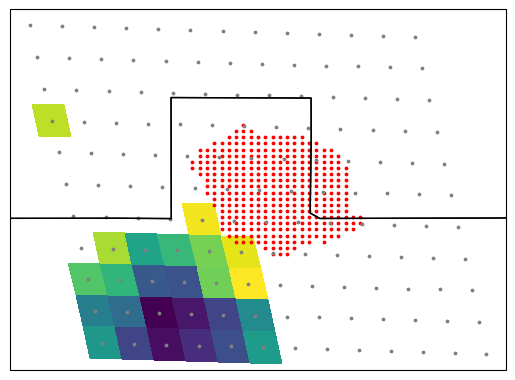

In [86]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.pcolormesh(sat_lon, sat_lat, feature_area_i_want.TEMP, transform=ccrs.PlateCarree())
ax.scatter(relevant_lons, relevant_lats, s=3, c='red', transform=ccrs.PlateCarree())
ax.scatter(sat_lon, sat_lat, s=3, c='gray', transform=ccrs.PlateCarree())
ax.add_feature(USCOUNTIES.with_scale('5m'))

/var/folders/sp/1j_lh9313dg42jrzhsfb4mk40000gn/T/ipykernel_80818/1437510626.py:8: RuntimeWarning: All-NaN slice encountered
  np.nanmin(vals_i_want)


np.float64(nan)

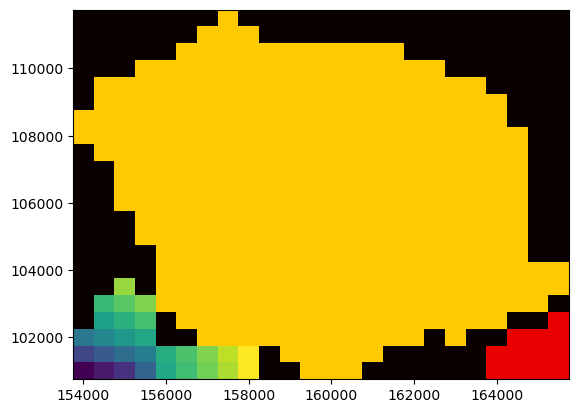

In [84]:
fig = plt.figure()
ax = fig.gca()
# ax.scatter(this_feature_x2d, this_feature_y2d, s=3, c='gray')
ax.scatter(grid_x2d[x_indices_valid, y_indices_valid], grid_y2d[x_indices_valid, y_indices_valid], s=3, c='r')
ax.pcolormesh(this_feature_x2d, this_feature_y2d, this_seg_mask, vmin=48, vmax=51, cmap='hot')
ax.pcolormesh(this_feature_x2d, this_feature_y2d, vals)


In [47]:
def get_time(utc_nanoseconds):
    if type(utc_nanoseconds) == np.datetime64:
        return utc_nanoseconds
    else:
        return np.datetime64(utc_nanoseconds, 'ns')

In [48]:
def get_time_str(utc_nanoseconds):
    time_str = dt.fromtimestamp(float(utc_nanoseconds) / 1e9, UTC).strftime('%Y-%m-%d %H:%M:%S')
    return time_str

In [60]:
def plot_seg_mask(dataset, time):
    this_time = dataset.sel(time=time, method='nearest')
    seg_mask = this_time.segmentation_mask.data.copy().astype(float)
    seg_mask[seg_mask == 0] = np.nan
    plot = gv.QuadMesh((this_time.lon, this_time.lat, seg_mask), kdims=['lon', 'lat'], vdims=['segmentation mask']).opts(cmap='plasma', colorbar=False)
    return plot

In [55]:
def plot_features(dataset, time):
    lats = dataset.feature_lat[dataset.feature_time == time]
    lons = dataset.feature_lon[dataset.feature_time == time]
    feat_ids = dataset.feature[dataset.feature_time == time]
    return gv.Points((lons, lats, feat_ids), kdims=['lon', 'lat'], vdims=['Feature ID']).opts(color='Cell ID', cmap='plasma', colorbar=True, tools=['hover'], size=4, line_color='k', line_width=0.5)

In [64]:
col

Column
    [0] DiscreteSlider(name='Date', options=[np.datetime64('2022-06-01...], value=np.datetime64('2022-06-01T...)
    [1] Markdown(str)
    [2] HoloViews(DynamicMap, height=800, sizing_mode='fixed', width=800)

In [53]:
download_results

,file,product_mode,satellite,start,end,creation,product,mode_bands,mode,band,valid,tobac_idx
0,noaa-goes16/ABI-L2-ACHTF/2022/151/23/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-05-31 23:50:20.500,2022-05-31 23:59:51.300,2022-06-01 00:03:05.500,ABI-L2-ACHTF,M6,6,None,2022-05-31 23:55:05.900,0
1,noaa-goes16/ABI-L2-ACHTF/2022/152/00/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 00:00:20.500,2022-06-01 00:09:51.300,2022-06-01 00:13:38.100,ABI-L2-ACHTF,M6,6,None,2022-06-01 00:05:05.900,1
2,noaa-goes16/ABI-L2-ACHTF/2022/152/00/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 00:10:20.500,2022-06-01 00:19:51.300,2022-06-01 00:23:50.700,ABI-L2-ACHTF,M6,6,None,2022-06-01 00:15:05.900,4
3,noaa-goes16/ABI-L2-ACHTF/2022/152/00/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 00:20:20.500,2022-06-01 00:29:51.300,2022-06-01 00:33:12.300,ABI-L2-ACHTF,M6,6,None,2022-06-01 00:25:05.900,6
4,noaa-goes16/ABI-L2-ACHTF/2022/152/00/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 00:30:20.500,2022-06-01 00:39:51.300,2022-06-01 00:43:19.400,ABI-L2-ACHTF,M6,6,None,2022-06-01 00:35:05.900,9
...,...,...,...,...,...,...,...,...,...,...,...,...
141,noaa-goes16/ABI-L2-ACHTF/2022/152/23/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 23:20:20.600,2022-06-01 23:29:51.400,2022-06-01 23:33:03.400,ABI-L2-ACHTF,M6,6,None,2022-06-01 23:25:06.000,278
142,noaa-goes16/ABI-L2-ACHTF/2022/152/23/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 23:30:20.600,2022-06-01 23:39:51.400,2022-06-01 23:42:47.000,ABI-L2-ACHTF,M6,6,None,2022-06-01 23:35:06.000,280
143,noaa-goes16/ABI-L2-ACHTF/2022/152/23/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 23:40:20.600,2022-06-01 23:49:51.400,2022-06-01 23:53:31.300,ABI-L2-ACHTF,M6,6,None,2022-06-01 23:45:06.000,281
144,noaa-goes16/ABI-L2-ACHTF/2022/152/23/OR_ABI-L2...,ABI-L2-ACHTF-M6,G16,2022-06-01 23:50:20.600,2022-06-01 23:59:51.400,2022-06-02 00:03:14.000,ABI-L2-ACHTF,M6,6,None,2022-06-01 23:55:06.000,283


In [ ]:
l1b_ds_trimmed

In [ ]:
fk1 = 1.08033e+04
fk2 = 1.39274e+03
bc1 = 0.07550
bc2 = 0.99975

l1b_ds_trimmed['temp'] = (fk2 / (np.log((fk1 / l1b_ds_trimmed.Rad) + 1))  -  bc1) / bc2

In [ ]:
vmin = np.min([l1b_ds_trimmed.temp.min(), ctt_ds.TEMP.min()])
vmax = np.min([l1b_ds_trimmed.temp.max(), ctt_ds.TEMP.max()])

In [ ]:
geosys = coords.GeographicSystem()
satsys = coords.GeostationaryFixedGridSystem(subsat_lon=l1b_ds.nominal_satellite_subpoint_lon.data.item(), sweep_axis='x')

In [ ]:
x_2d, y_2d = np.meshgrid(l1b_ds_trimmed.x.data, l1b_ds_trimmed.y.data)

In [ ]:
lon, lat, alt = geosys.fromECEF(*satsys.toECEF(x_2d, y_2d, np.zeros_like(x_2d)))
lon = lon.reshape(x_2d.shape)
lat = lat.reshape(y_2d.shape)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = ax.pcolormesh(lon, lat, l1b_ds_trimmed.temp.data, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.STATES)
fig.colorbar(pcm)

In [ ]:
ecef_coords = satsys.toECEF(ctt_ds.x.data, ctt_ds.y.data, np.zeros_like(ctt_ds.x.data))

In [ ]:
lon, lat, alt = geosys.fromECEF(*ecef_coords)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = ax.pcolormesh(lon, lat, ctt_ds.TEMP.data, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.STATES)
fig.colorbar(pcm)

In [ ]:
for feat_id in tfm.feature:
    print(feat_id)
    this_time = tfm.isel(time=0)
    this_mask_lon = this_time.lon.where(this_time.segmentation_mask == feat_id)
    this_mask_lat = this_time.lat.where(this_time.segmentation_mask == feat_id)
    this_mask = this_time.segmentation_mask.where(this_time.segmentation_mask == feat_id)
    break

In [ ]:
this_mask_ecef = geosys.toECEF(this_time.lon, this_time.lat, np.zeros_like(this_time.lat))

In [ ]:
this_mask_x, this_mask_y, _ = satsys.fromECEF(*this_mask_ecef)

In [ ]:
fig = plt.figure()
ax = fig.gca()
pcm = ax.pcolormesh(l1b_ds_trimmed.x, l1b_ds_trimmed.y, l1b_ds_trimmed.temp, vmin=vmin, vmax=vmax)
mask = ax.pcolormesh(this_mask_x, this_mask_y, this_mask, cmap='Reds_r')
fig.colorbar(pcm)